<a href="https://colab.research.google.com/github/tiaL-ops/Data-MLProject/blob/main/MadaDiversity_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Discovering Malagasy Diversity Through AI Insights**


Madagascar's demographic composition is characterized by a fascinating blend of African and Asian ancestry, as supported by linguistic and archaeological evidence. This fusion of African and Indonesian heritage is notably reflected in the diverse aspects of Malagasy culture, including their culinary traditions and physical features. This unique amalgamation contributes to the distinctiveness of the Malagasy people.

Utilizing artificial intelligence (AI) to discern and quantify these intricate features, such as the percentage of African and Asian genetic influence, can yield remarkable insights. It is essential to acknowledge that AI's outcomes may sometimes appear unconventional or biased. However, it is imperative to recognize that AI's performance is intrinsically linked to the data it is provided with.

In this context, the data sources utilized to train AI models significantly influence the results. For instance, images available on platforms like Pinterest or Google, when used to describe East African people, may tend to generalize certain features. Nevertheless, it is important to underline that general features do exist among population groups, even though individual variations persist.



**Here is some of the result of Teachable Machine**:
*Featuring my friends, Heri, Landy , and Iri* :))

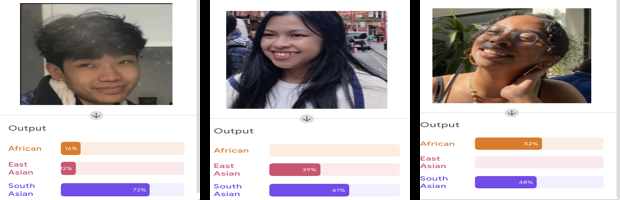

In [28]:
from IPython.display import display
from PIL import Image

# Load the images
image_heri = Image.open('/content/Heri.png')
image_landy = Image.open('/content/Landy.png')
image_iri = Image.open('/content/Irintsoa.png')


new_size = (200, 200)

# Resize the images
image_heri_resized = image_heri.resize(new_size)
image_landy_resized = image_landy.resize(new_size)
image_iri_resized = image_iri.resize(new_size)


width, height = image_heri_resized.size
new_width = width * 3 + 20
new_height = height
new_image = Image.new('RGB', (new_width, new_height))


new_image.paste(image_heri_resized, (0, 0))
new_image.paste(image_landy_resized, (width + 10, 0))
new_image.paste(image_iri_resized, (2 * width + 20, 0))


display(new_image)


**Steps I took:**

**Step 1: Acquiring the Model Code**
I began by obtaining the source code from the Teachable Machine model, which served as the foundation for my project.

**Step 2: Downloading and Uploading the Model**
After acquiring the code, I proceeded to download it and subsequently uploaded it to my personal model environment, ensuring it was readily available for further modification.


**Step 3: Expanding Data Inputs**
Rather than restricting the analysis to a solitary image, I extended the code's capabilities. Specifically, I adapted the code to accept and process data from 15 distinct images of my friends, allowing for a more comprehensive analysis.

**Step 4: Data Collection**
Following the incorporation of multiple data inputs, I collected and stored the resulting dataset, which contained the information necessary for subsequent analysis.

**Step 5: Data Analysis and Visualization**
To gain insights from the collected data, I graphed the result. This visualization depicted the average attributes of ind ividuals from East Asian, African, and South Asian backgrounds within my circle of friends.


In [39]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf

# Initialize a dictionary to store the counts and scores for each class
class_counts = defaultdict(int)
class_scores = defaultdict(float)

# Load the model
model = tf.keras.models.load_model("/content/keras_model.h5", compile=False)

# Load the labels
with open("/content/labels.txt", "r") as labels_file:
    class_names = [line.strip() for line in labels_file.readlines()]


#Modified code from teachable machine

image_folder = "/content/drive/MyDrive/Fall 2023/Data & Machine Learning/Malagasy Project Feature Project/Gasy"

image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Iterate through all image files
for image_file in image_files:
    try:
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path).convert("RGB")

        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

        image_array = np.asarray(image)

        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

        data[0] = normalized_image_array

        # Predict the model
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]
        confidence_score = prediction[0][index]

        # Print prediction and confidence score for each image
        print(f"Image: {image_file}")
        print("Class:", class_name)
        print("Confidence Score:", confidence_score)
        print("\n")

        # Update class counts and scores
        class_counts[class_name] += 1
        class_scores[class_name] += confidence_score

    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")




1/1 [==============================] - 1s 988ms/step
Image: Lova.png
Class: 0 African
Confidence Score: 0.9877566


1/1 [==============================] - 0s 42ms/step
Image: Njaka.png
Class: 0 African
Confidence Score: 0.999913


1/1 [==============================] - 0s 39ms/step
Image: Tiana.png
Class: 2 South Asian
Confidence Score: 0.56119466


1/1 [==============================] - 0s 36ms/step
Image: Rija.png
Class: 2 South Asian
Confidence Score: 0.89717567


1/1 [==============================] - 0s 36ms/step
Image: Orlando.png
Class: 2 South Asian
Confidence Score: 0.9998344


1/1 [==============================] - 0s 41ms/step
Image: Irina.png
Class: 2 South Asian
Confidence Score: 0.94058716


1/1 [==============================] - 0s 36ms/step
Image: Nancy.png
Class: 2 South Asian
Confidence Score: 0.9945642


1/1 [==============================] - 0s 65ms/step
Image: Lalaniaina.png
Class: 0 African
Confidence Score: 0.5451214


1/1 [==============================] - 0s 63

**Better Visualization of the result**:


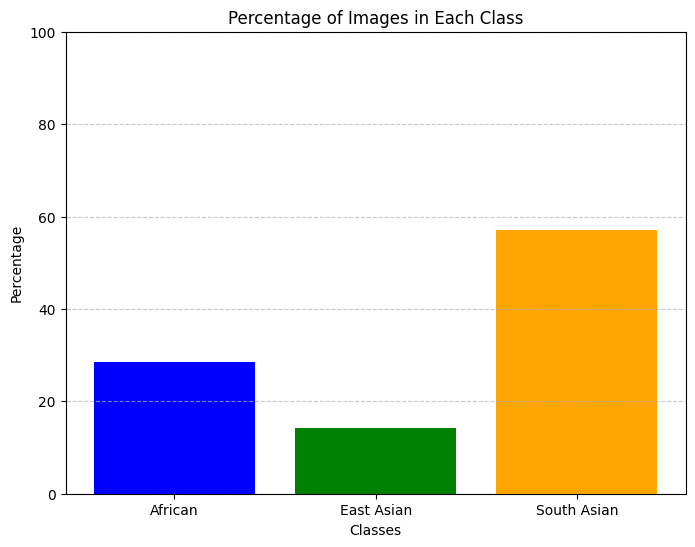

In [40]:
import matplotlib.pyplot as plt


data = [
    {"Image": "Lova.png", "Class": 0, "Confidence Score": 0.9877566},
    {"Image": "Njaka.png", "Class": 0, "Confidence Score": 0.999913},
    {"Image": "Tiana.png", "Class": 2, "Confidence Score": 0.56119466},
    {"Image": "Rija.png", "Class": 2, "Confidence Score": 0.89717567},
    {"Image": "Orlando.png", "Class": 2, "Confidence Score": 0.9998344},
    {"Image": "Irina.png", "Class": 2, "Confidence Score": 0.94058716},
    {"Image": "Nancy.png", "Class": 2, "Confidence Score": 0.9945642},
    {"Image": "Lalaniaina.png", "Class": 0, "Confidence Score": 0.5451214},
    {"Image": "Andy.png", "Class": 1, "Confidence Score": 0.85215294},
    {"Image": "Landy.png", "Class": 2, "Confidence Score": 0.63939965},
    {"Image": "Irintsoa.png", "Class": 0, "Confidence Score": 0.9879987},
    {"Image": "Cynthia.png", "Class": 2, "Confidence Score": 0.9952106},
    {"Image": "Heri.png", "Class": 2, "Confidence Score": 0.5774896},
    {"Image": "Koloina.png", "Class": 1, "Confidence Score": 0.8322143},
]


class_counts = {0: 0, 1: 0, 2: 0}

for item in data:
    class_counts[item["Class"]] += 1


total_samples = len(data)
class_percentages = {key: (count / total_samples) * 100 for key, count in class_counts.items()}

classes = ['African', 'East Asian', 'South Asian']
percentages = [class_percentages.get(0, 0), class_percentages.get(1, 0), class_percentages.get(2, 0)]

plt.figure(figsize=(8, 6))
plt.bar(classes, percentages, color=['blue', 'green', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title('Percentage of Images in Each Class')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Future Project**


In this preliminary project plan, I delve into the challenges and opportunities of employing artificial intelligence (AI) to investigate the diverse features of the Malagasy population.

Data collection is the foundation of my project. To begin, I've gathered a collection of images primarily from accessible sources like Google and Pinterest. However, I must acknowledge the inherent biases within such data sources. The images available online often present a curated perspective of individuals, and this selection bias can impact the accuracy of our analysis.

For mt test subjects, I've chosen to focus on a group of my friends. While this provides an initial starting point, I understand that my friends do not represent the entire Malagasy population. Future iterations of this project may benefit from a more diverse and representative sample to ensure the generalizability of our findings.

To enhance the depth of this analysis, I intend to conduct a feature-specific examination. This means delving into individual facial characteristics like eyes, nose, and skin tone/color. However, I must emphasize that this approach requires a more extensive dataset to yield meaningful insights. Obtaining access to a broader and more diverse dataset is an avenue for potential improvement in the later phases of our project.


In conclusion, this project represents an initial foray into using AI for a nuanced examination of Malagasy diversity. While I anticipate challenges, it provides valuable insights and lays the foundation for more comprehensive research in the future. Addressing data biases and expanding our dataset will be critical steps to ensure the project's accuracy and applicability to the broader Malagasy population.
